In [2]:
#%%

import pandas as pd
from IPython.display import display

# Definizione delle ripartizioni geografiche
aree_geografiche = {
    'NORD': ['Veneto', 'Friuli-Venezia Giulia', 'Liguria', 'Emilia-Romagna'],
    'CENTRO': ['Toscana', 'Marche', 'Lazio'],
    'SUD': ['Abruzzo', 'Molise', 'Campania', 'Puglia', 'Basilicata', 'Calabria'],
    'ISOLE': ['Sicilia', 'Sardegna']
}


def assegna_area(regione):
    for area, regioni in aree_geografiche.items():
        if regione in regioni:
            return area
    return 'ALTRO'

df2 = pd.read_excel("C:/Users/Giuseppe/Desktop/Stage_exprivia/Python/Analisi_coste/Difesa_costiera.xls")

df2.columns = df2.iloc[0]
df2 = df2.drop(0, axis=0)
df2.columns = df2.columns.str.strip()
df2['Regioni'] = df2['Regioni'].ffill()


df_pivot = df2.pivot(index='Regioni', columns='Anno', 
                     values=['Isolotti', 'Opere Miste', 'Pennelli', 'Radenti', 'Scogliere', 'Totali'])

df_pivot.columns = [f"{col[0]}_{col[1]}" for col in df_pivot.columns]
df_pivot = df_pivot.reset_index()
df_pivot_cleaned = df_pivot.loc[:, ~df_pivot.columns.str.contains('nan')]
df2 = df_pivot_cleaned

italia_row = df2[df2['Regioni'].str.contains('Totale', case=False, na=False)]
other_rows = df2[~df2['Regioni'].str.contains('Totale', case=False, na=False)]

other_rows['Area_Geografica'] = other_rows['Regioni'].apply(assegna_area)

# Ordina prima per area geografica e poi per regione
other_rows = other_rows.sort_values(['Area_Geografica', 'Regioni'])
df2 = pd.concat([other_rows, italia_row]).reset_index(drop=True) 
df2.index = df2.index + 1


df_nord = df2[df2['Area_Geografica'] == 'NORD']
df_centro = df2[df2['Area_Geografica'] == 'CENTRO']
df_sud = df2[df2['Area_Geografica'] == 'SUD']
df_isole = df2[df2['Area_Geografica'] == 'ISOLE']


display(df_nord)
display(df_centro)
display(df_sud)
display(df_isole)

,Regioni,Isolotti_2000,Isolotti_2006,Isolotti_2020,Opere Miste_2000,Opere Miste_2006,Opere Miste_2020,Pennelli_2000,Pennelli_2006,Pennelli_2020,Radenti_2000,Radenti_2006,Radenti_2020,Scogliere_2000,Scogliere_2006,Scogliere_2020,Totali_2000,Totali_2006,Totali_2020,Area_Geografica
6,Emilia-Romagna,22,21,1,5,29,12,100,81,86,11,23,53,333,324,331,471,478,483,NORD
7,Friuli-Venezia Giulia,0,2,2,5,15,9,92,109,113,96,136,277,5,7,8,198,269,409,NORD
8,Liguria,12,6,4,48,59,65,329,334,352,232,331,478,67,97,76,688,827,975,NORD
9,Veneto,0,0,0,3,21,26,354,181,207,289,363,421,52,53,59,698,618,713,NORD


,Regioni,Isolotti_2000,Isolotti_2006,Isolotti_2020,Opere Miste_2000,Opere Miste_2006,Opere Miste_2020,Pennelli_2000,Pennelli_2006,Pennelli_2020,Radenti_2000,Radenti_2006,Radenti_2020,Scogliere_2000,Scogliere_2006,Scogliere_2020,Totali_2000,Totali_2006,Totali_2020,Area_Geografica
1,Lazio,2,1,2,11,23,46,76,88,164,46,119,206,162,157,162,297,388,580,CENTRO
2,Marche,1,0,0,7,21,12,37,84,102,60,122,195,598,652,677,703,879,986,CENTRO
3,Toscana,0,0,0,28,40,51,50,64,101,88,117,194,126,101,75,292,322,421,CENTRO


,Regioni,Isolotti_2000,Isolotti_2006,Isolotti_2020,Opere Miste_2000,Opere Miste_2006,Opere Miste_2020,Pennelli_2000,Pennelli_2006,Pennelli_2020,Radenti_2000,Radenti_2006,Radenti_2020,Scogliere_2000,Scogliere_2006,Scogliere_2020,Totali_2000,Totali_2006,Totali_2020,Area_Geografica
10,Abruzzo,2,1,2,5,14,34,26,45,93,41,59,169,439,435,380,513,554,678,SUD
11,Basilicata,0,0,0,0,0,1,0,2,11,0,1,3,0,0,13,0,3,28,SUD
12,Calabria,0,4,5,35,38,57,97,161,300,173,453,471,126,176,290,431,832,1123,SUD
13,Campania,28,31,24,28,37,83,113,117,157,191,234,442,178,184,225,538,603,931,SUD
14,Molise,0,0,0,4,1,2,13,41,42,13,15,25,60,116,118,90,173,187,SUD
15,Puglia,0,0,1,79,79,45,330,332,407,173,299,379,76,94,123,658,804,955,SUD


,Regioni,Isolotti_2000,Isolotti_2006,Isolotti_2020,Opere Miste_2000,Opere Miste_2006,Opere Miste_2020,Pennelli_2000,Pennelli_2006,Pennelli_2020,Radenti_2000,Radenti_2006,Radenti_2020,Scogliere_2000,Scogliere_2006,Scogliere_2020,Totali_2000,Totali_2006,Totali_2020,Area_Geografica
4,Sardegna,0,0,1,1,3,7,5,14,39,94,99,192,13,20,21,113,136,260,ISOLE
5,Sicilia,1,53,56,45,31,62,275,330,420,262,472,800,381,387,498,964,1273,1836,ISOLE


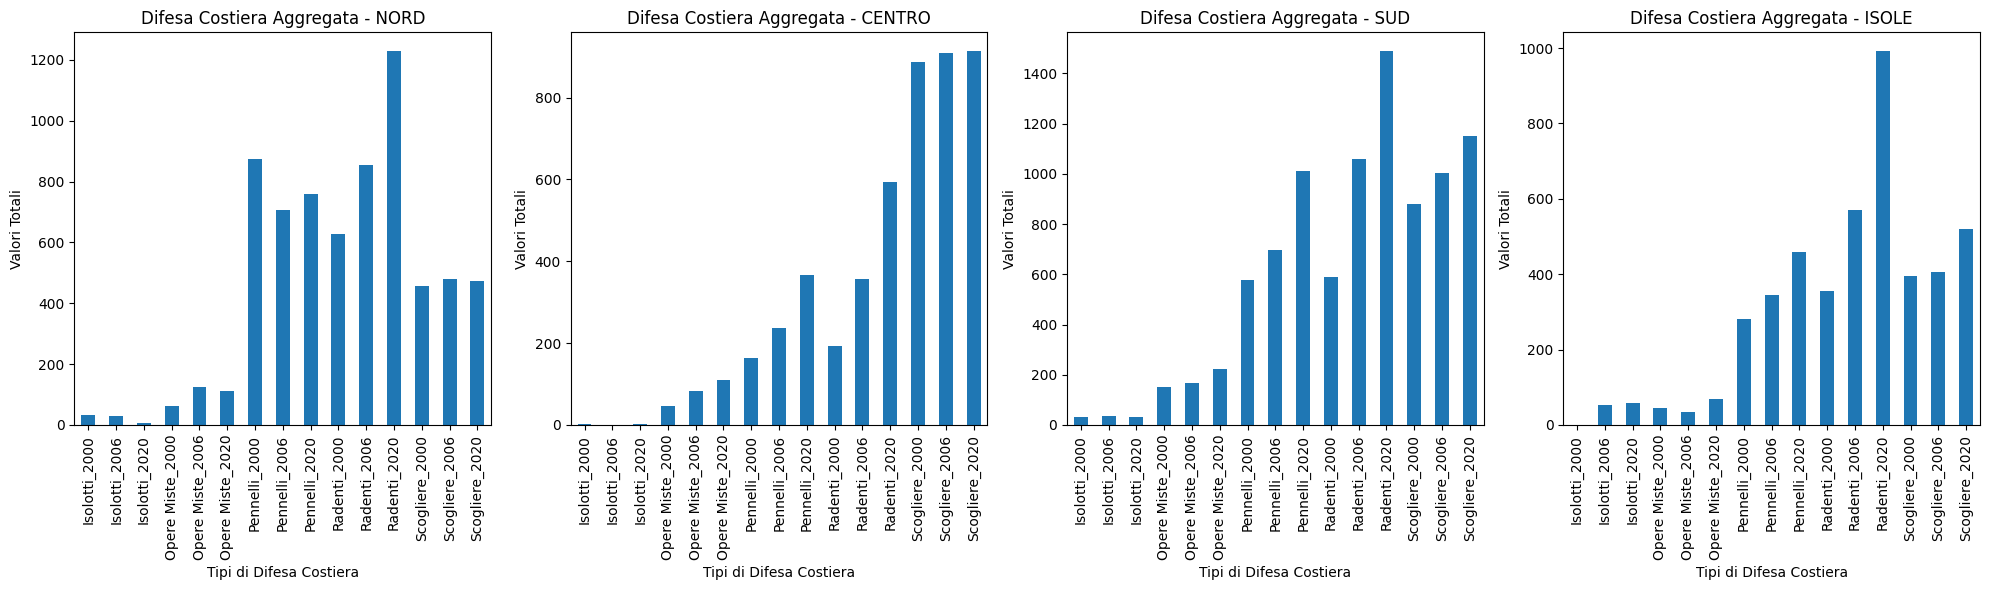

In [3]:
# %%

import matplotlib.pyplot as plt

def plot_bar_chart(df, ax, title):
    df_filtered = df.loc[:, ~df.columns.str.contains('Totali')]
    df_sum = df_filtered.iloc[:, 1:-1].sum() 
    df_sum.plot(kind='bar', ax=ax)
    ax.set_title(f'Difesa Costiera Aggregata - {title}')
    ax.set_xlabel('Tipi di Difesa Costiera')
    ax.set_ylabel('Valori Totali')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Creazione istogramma con 4 campi
fig, axes = plt.subplots(1, 4, figsize=(20, 6))


plot_bar_chart(df_nord, axes[0], 'NORD')
plot_bar_chart(df_centro, axes[1], 'CENTRO')
plot_bar_chart(df_sud, axes[2], 'SUD')
plot_bar_chart(df_isole, axes[3], 'ISOLE')


plt.tight_layout()

plt.show()

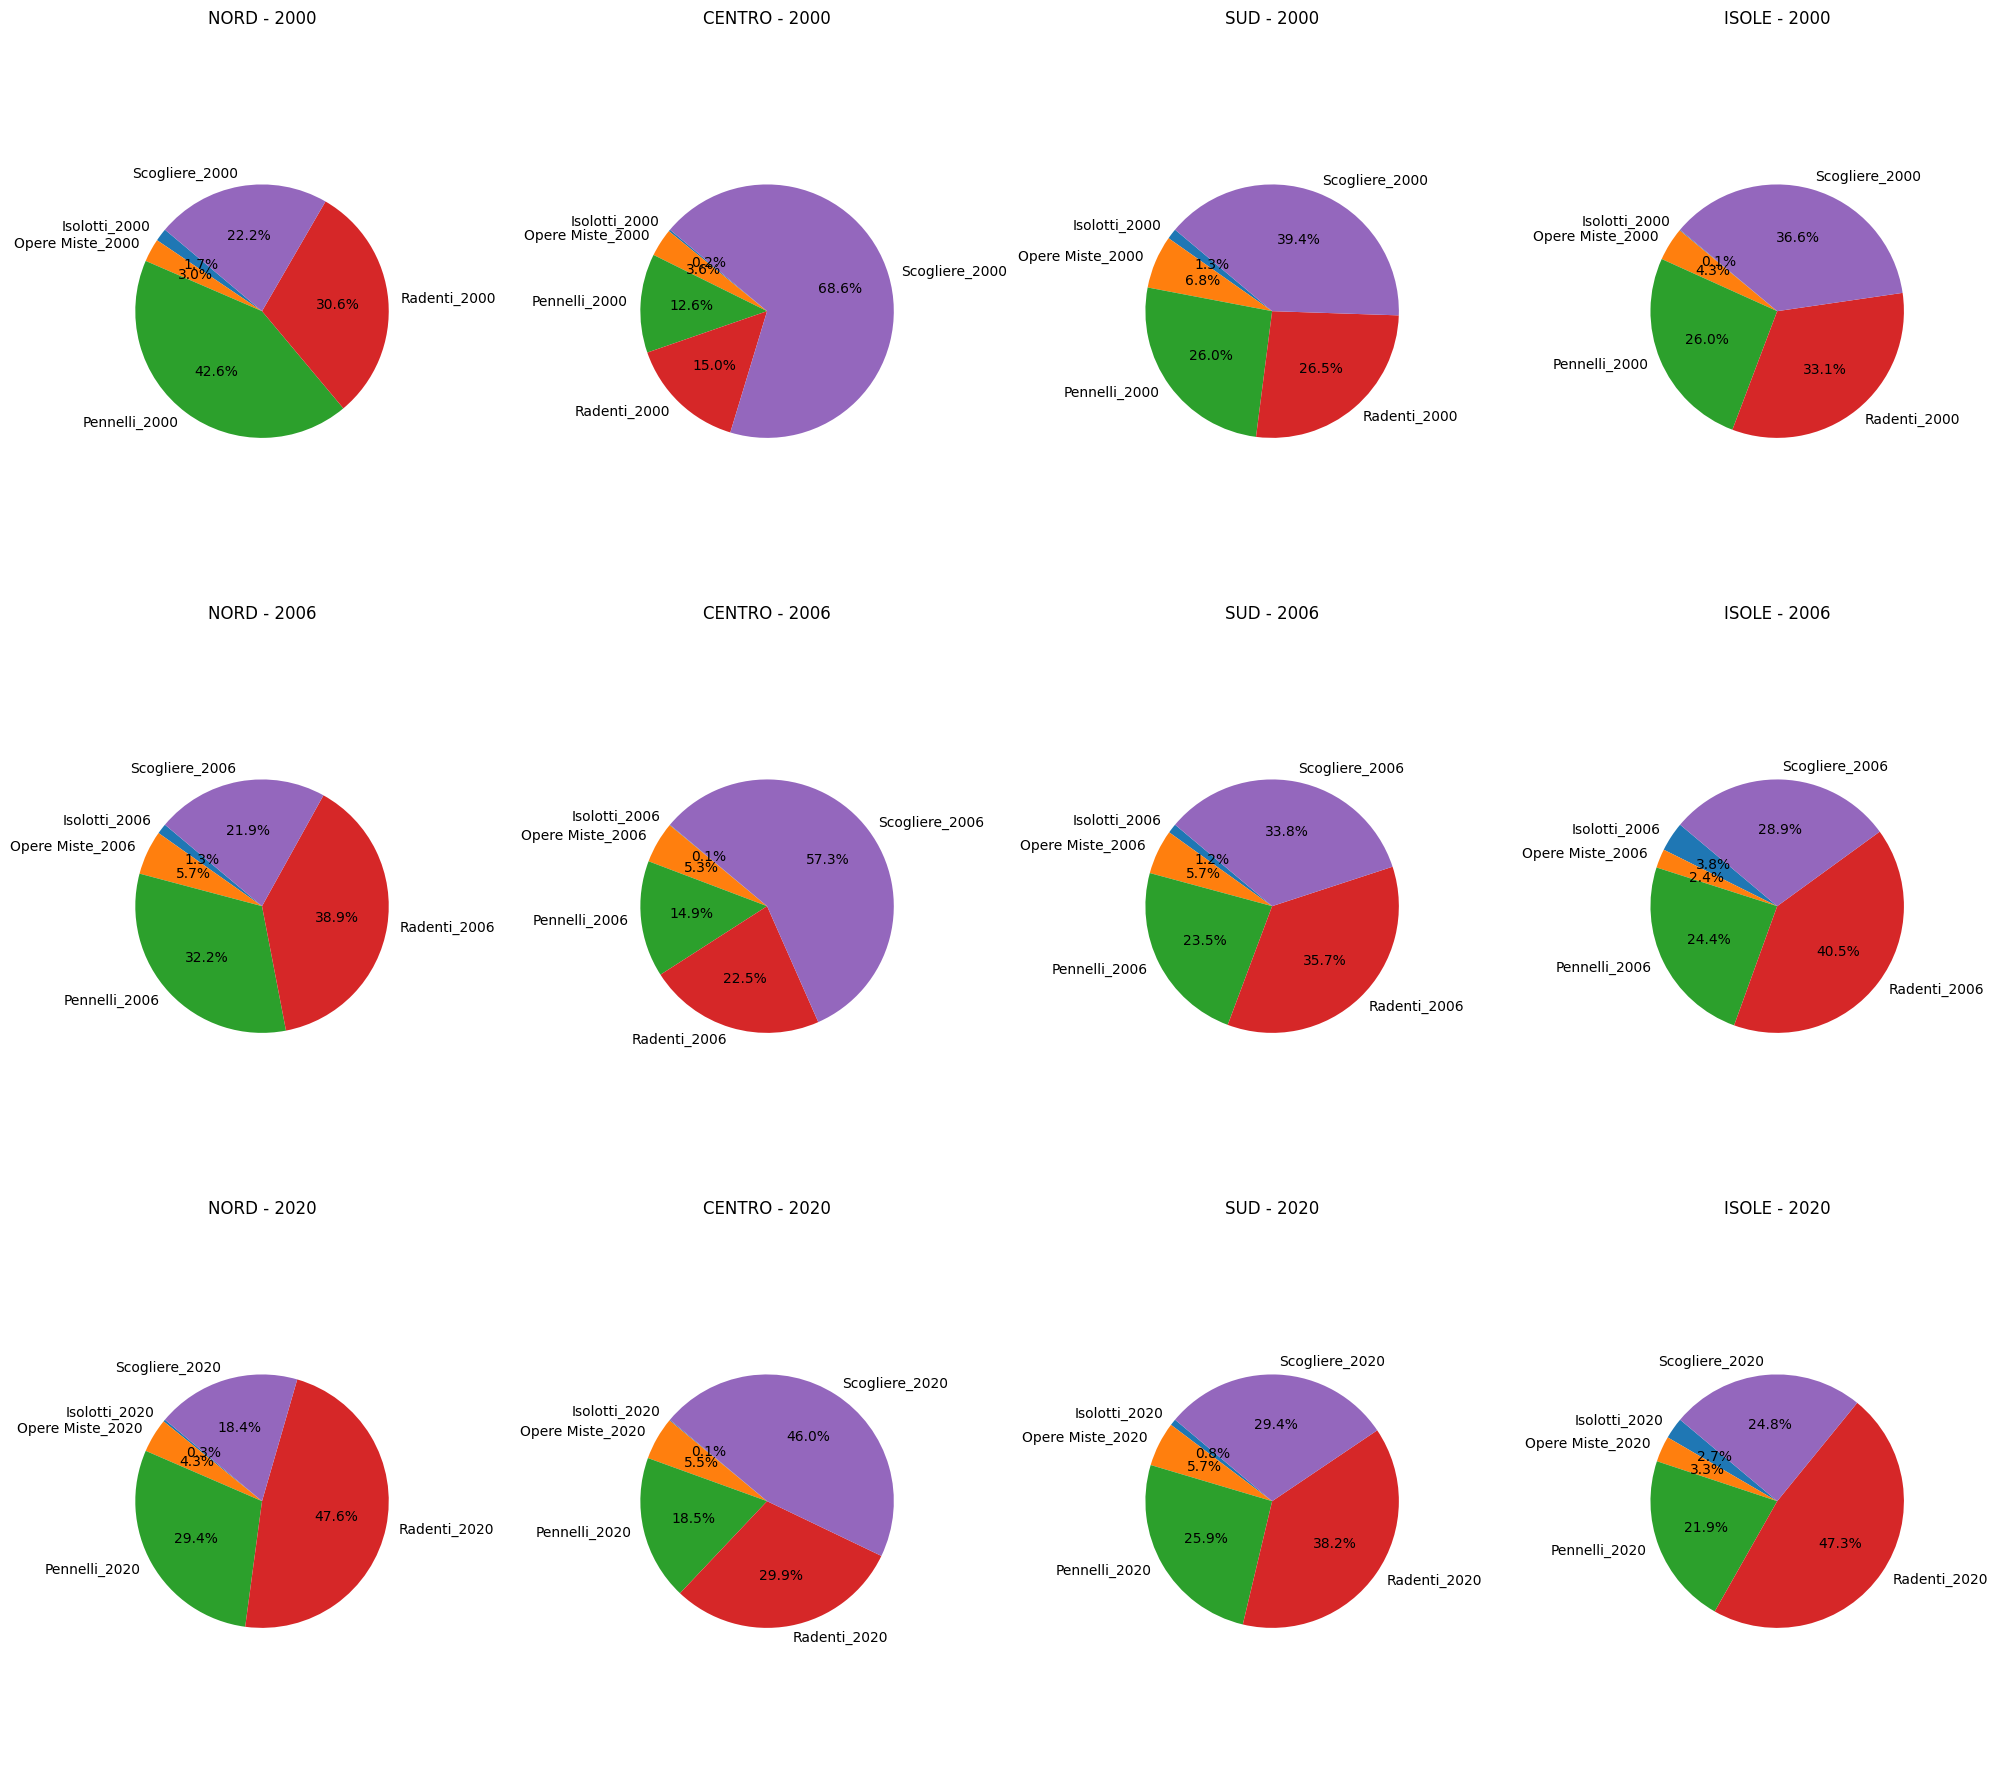

In [4]:
# %%

import matplotlib.pyplot as plt

# Creazione della torta eliminando il campo 'Totali'
def plot_pie_chart_year(df, year, ax, title):
    columns_of_year = [col for col in df.columns if str(year) in col and 'Totali' not in col]
    df_filtered = df.loc[:, columns_of_year]
    df_sum = df_filtered.sum()  # somma i valori per ogni annata
    ax.pie(df_sum, labels=df_sum.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'{title} - {year}')
    ax.axis('equal')  # Definizione del cerchio


years = [2000, 2006, 2020] # Anni di interesse


fig, axes = plt.subplots(len(years), 4, figsize=(20, 18)) # Creazione della figura


for i, year in enumerate(years): # Spicchi della torta con definizione aree di interesse
    plot_pie_chart_year(df_nord, year, axes[i, 0], 'NORD')
    plot_pie_chart_year(df_centro, year, axes[i, 1], 'CENTRO')
    plot_pie_chart_year(df_sud, year, axes[i, 2], 'SUD')
    plot_pie_chart_year(df_isole, year, axes[i, 3], 'ISOLE')


plt.tight_layout()
plt.show()